# TP: Machine Learning (SIA_3611)

## TP1: Linear Regression (4h)

by Clément Bouvier

Linear regression is a family of machine learning algorithms aiming at adjusting a linear model to an ensemble of data. The applications range from signal reconstruction to empirical description.

The given dataset was produced by the World Health Organization. It pooled the evolution of 20 features for 15 years and among numerous countries. One of the goals of this TP1 is to manipulate this dataset and try to predict the evolution of Life Expectancy through different variables.

**Objectives:**
- Use and setup an iPython environment
- Manipulate and visualize data
- Implement a simple linear regression
- Apply the aforementioned linear regression
- Compute a $R^2$ on the generated results
- Apply Ridge and Lasso regressions


## STEP 1: Use and setup an iPython environment

iPython and Notebook environments are useful tools to quickly prototype and test machine learning solutions. However, they have limitations especially in RAM and disk access.

**TO DO 1.1**

Execute the following cells

In [1]:
a = 3
b = 4
c = a + b

In [2]:
c = c

In [3]:
print(c)

7


In [4]:
c

7

**QUESTION 1**

What is triggering the output display?

**TO DO 1.2**

Execute the following cells

In [5]:
import shutil
import pkgutil

def show_acceptable_modules():
    line = '-' * 100
    print('{}\n{:^30}|{:^20}\n{}'.format(line, 'Module', 'Location', line))
    for entry in pkgutil.iter_modules():
        print('{:30}| {}'.format(entry[1], entry[0].path))

In [6]:
show_acceptable_modules()

----------------------------------------------------------------------------------------------------
            Module            |      Location      
----------------------------------------------------------------------------------------------------
_asyncio                      | C:\Users\hp\anaconda3\DLLs
_bz2                          | C:\Users\hp\anaconda3\DLLs
_ctypes                       | C:\Users\hp\anaconda3\DLLs
_ctypes_test                  | C:\Users\hp\anaconda3\DLLs
_decimal                      | C:\Users\hp\anaconda3\DLLs
_elementtree                  | C:\Users\hp\anaconda3\DLLs
_hashlib                      | C:\Users\hp\anaconda3\DLLs
_lzma                         | C:\Users\hp\anaconda3\DLLs
_msi                          | C:\Users\hp\anaconda3\DLLs
_multiprocessing              | C:\Users\hp\anaconda3\DLLs
_overlapped                   | C:\Users\hp\anaconda3\DLLs
_queue                        | C:\Users\hp\anaconda3\DLLs
_socket                       | C:\Use

AttributeError: 'zipimporter' object has no attribute 'path'

**QUESTION 2**

What is displayed on the last output?

function to iterate through available modules and display their names and locations. Then, it prints this information in a tabular format.

Which is the used Python version?

python3

For this TP1, you will need:
- pandas
- matplotlib
- numpy
- sklearn

Are these packages installed in this environment?

They're not imported yet !

**TO DO 1.3**

Execute the following cell

In [7]:
import pandas as pd
pd.__version__

'1.3.4'

**QUESTION 3**

How would you solve this error?

## STEP 2: Data manipulation and visualization


**TO DO 2.1**

Execute the following cell

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("C:\\Users\\hp\\Desktop\\3A-SIA\\ML\Life_Expectancy_Data.csv")
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Longitude                        1649 non-null   float64
 2   Latitude                         1649 non-null   float64
 3   Continent                        1649 non-null   object 
 4   Year                             1649 non-null   int64  
 5   Status                           1649 non-null   object 
 6   Life_expectancy                  1649 non-null   float64
 7   Adult_mortality                  1649 non-null   float64
 8   Infant_deaths                    1649 non-null   int64  
 9   Alcohol                          1649 non-null   float64
 10  Percentage_expenditure           1649 non-null   float64
 11  Hepatitis_B                      1649 non-null   float64
 12  Measles             

**QUESTION 4**

Can you explain the different elements printed on the last output?


We print in the df1, all information(Life Expectancy) we have on the selected country "France" over the years started from 2011
In the second one, df2, we print the years column for the selected country "France"

In [12]:
df1 = df[(df.Country == "France") & (df.Year > 2010)]
print("df1: ", df1)
df2 = df[(df.Country == "France")].Year
print("df2: ", df2)

df1:      Country  Longitude  Latitude Continent  Year      Status  Life_expectancy  \
931  France  -2.761729  42.17344    Europe  2014  Developing             82.2   
932  France  -2.761729  42.17344    Europe  2013  Developing             82.0   
933  France  -2.761729  42.17344    Europe  2012  Developing             81.5   
934  France  -2.761729  42.17344    Europe  2011  Developing             81.7   

     Adult_mortality  Infant_deaths  Alcohol  ...  Polio  Total_expenditure  \
931             79.0              3     11.5  ...   98.0              11.54   
932             81.0              3     11.1  ...   99.0              11.56   
933             83.0              3     11.5  ...   99.0              11.44   
934             83.0              3     11.8  ...   99.0              11.33   

     Diphtheria  HIV_AIDS          GDP  Population  Thinness _1-19_years  \
931        98.0       0.1  42955.24287  66331957.0                   0.6   
932        99.0       0.1  42554.12250  

**QUESTION 5**

How do you interpret the new Data Frame df1 compared to df? What represents df2 compared to df1?


df2 shows us all the dates for the country "France" available in our csv while df1 only displays all the data present on the country "France" after 2010

**TO CODE 2.2**

What is the range of life expectancy of Belgium between 2004 and 2008?

In [13]:
df3 = df[(df.Country == "Belgium") & (df.Year > 2004) & (df.Year  <2008)]
print("df3: ", df3)

df3:       Country  Longitude   Latitude Continent  Year     Status  \
248  Belgium   4.640651  50.639816    Europe  2007  Developed   
249  Belgium   4.640651  50.639816    Europe  2006  Developed   
250  Belgium   4.640651  50.639816    Europe  2005  Developed   

     Life_expectancy  Adult_mortality  Infant_deaths  Alcohol  ...  Polio  \
248             79.5             86.0              0    10.25  ...   99.0   
249             79.4             85.0              0    10.98  ...   99.0   
250             78.9             89.0              0    12.27  ...   97.0   

     Total_expenditure  Diphtheria  HIV_AIDS          GDP  Population  \
248               9.25        98.0       0.1   4443.83131     16257.0   
249               9.17        98.0       0.1  38852.36130   1547958.0   
250               9.24        97.0       0.1  36967.28292   1478617.0   

     Thinness _1-19_years  Thinness_5-9_years  \
248                   0.8                 0.8   
249                   0.8        

**TO DO 2.3**

Compute the correlation among all features

In [14]:
print(df.corr())

                                 Longitude  Latitude      Year  \
Longitude                         1.000000  0.064602 -0.018635   
Latitude                          0.064602  1.000000 -0.027252   
Year                             -0.018635 -0.027252  1.000000   
Life_expectancy                  -0.192675  0.432515  0.050771   
Adult_mortality                   0.091557 -0.348847 -0.037092   
Infant_deaths                     0.140981 -0.002955  0.008029   
Alcohol                          -0.202308  0.349825 -0.113365   
Percentage_expenditure           -0.057579  0.214447  0.069553   
Hepatitis_B                       0.012114  0.060178  0.114897   
Measles                           0.168937  0.033374 -0.053822   
BMI                              -0.233330  0.268139  0.005739   
Under-five_deaths                 0.134130 -0.011890  0.010479   
Polio                            -0.002238  0.179645 -0.016699   
Total_expenditure                -0.200847  0.043328  0.059493   
Diphtheria

**QUESTION 6**

Which seems the most and the least promising values to use as a predictor for life expectancy?

- Life_expectancy  -  Adult_mortality
- Diphtheria -  HIV_AIDS  -     GDP  - Population
- Income_composition_of_resources  - Schooling

The function scatter of matplotlib allows to plot two values against each other. Here is the documentation about this function:

```
matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
```
Parameters:

**x, y** float or array-like, shape (n, )

The data positions.

**s** float or array-like, shape (n, ), optional

The marker size in points**2. Default is rcParams['lines.markersize'] ** 2.

**c** array-like or list of colors or color, optional

The marker colors. Possible values:

- A scalar or sequence of n numbers to be mapped to colors using cmap and norm.

- A 2D array in which the rows are RGB or RGBA.

- A sequence of colors of length n.

- A single color format string.

**marker** MarkerStyle, default: rcParams (default: 'o')

The marker style. marker can be either an instance of the class or the text shorthand for a particular marker. See matplotlib.markers for more information about marker styles.

**cmapstr** or Colormap, default: rcParams(default: 'viridis')

A Colormap instance or registered colormap name. cmap is only used if c is an array of floats.

**norm** Normalize, default: None

If c is an array of floats, norm is used to scale the color data, c, in the range 0 to 1, in order to map into the colormap cmap. If None, use the default colors.Normalize.

**vmin, vmax** float, default: None

vmin and vmax are used in conjunction with the default norm to map the color array c to the colormap cmap. If None, the respective min and max of the color array is used. It is deprecated to use vmin/vmax when norm is given.

**alpha** float, default: None

The alpha blending value, between 0 (transparent) and 1 (opaque).

**linewidths** float or array-like, default: rcParams (default: 1.5)

The linewidth of the marker edges. Note: The default edgecolors is 'face'. You may want to change this as well.

**edgecolors** {'face', 'none', None} or color or sequence of color, default: rcParams["scatter.edgecolors"] (default: 'face')

The edge color of the marker. Possible values:

- 'face': The edge color will always be the same as the face color.

- 'none': No patch boundary will be drawn.
        
- A color or sequence of colors.

For non-filled markers, edgecolors is ignored. Instead, the color is determined like with 'face', i.e. from c, colors, or facecolors.

**plotnonfinite** bool, default: False

Whether to plot points with nonfinite c (i.e. inf, -inf or nan). If True the points are drawn with the bad colormap color (see Colormap.set_bad).


**TO CODE 2.4**

Plot life expectancy against one of your chosen values.

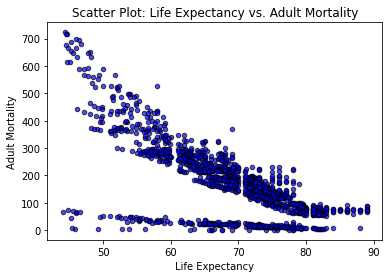

In [16]:
plt.scatter(
    df['Life_expectancy'],
    df['Adult_mortality'],
    s=20,
    c='blue',
    marker='o',
    cmap=None,
    alpha=0.7,
    edgecolors='black',
    linewidths=1,
)
plt.xlabel('Life Expectancy')
plt.ylabel('Adult Mortality')
plt.title('Scatter Plot: Life Expectancy vs. Adult Mortality')
plt.show()

## STEP 3: Simple Linear Regression

In [17]:
import numpy as np

**TO CODE 3.1**

Select the Life Expectancy and the Income composition of resources of Belarus, Madagascar, India and Lithuania. This new Data Frame will be called df_study

In [18]:
# List of countries to select
countries_to_select = ['Belarus', 'Madagascar', 'India', 'Lithuania']

# Select the rows for the specified countries and columns
df_study = df.loc[df['Country'].isin(countries_to_select), ['Country', 'Life_expectancy', 'Income_composition_of_resources']]

# Reset the index of the new DataFrame
df_study.reset_index(drop=True, inplace=True)
df_study

,Country,Life_expectancy,Income_composition_of_resources
0,Belarus,72.0,0.796
1,Belarus,71.7,0.796
2,Belarus,71.9,0.793
3,Belarus,72.0,0.787
4,Belarus,73.0,0.780
5,Belarus,70.0,0.771
6,Belarus,70.0,0.755
7,Belarus,69.8,0.739
8,Belarus,68.9,0.723
9,Belarus,68.1,0.713


**TO CODE 3.2**

Implement a simple least square function and apply it on the previous selected data.

In [19]:
def least_squares(X, Y):
    n = len(X)
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)

    numerator = np.sum((X - X_mean) * (Y - Y_mean))
    denominator = np.sum((X - X_mean) ** 2)

    # Calculate the slope (m) and intercept (b)
    w = numerator / denominator
    b = Y_mean - w * X_mean

    return w, b

In [20]:
# On df_study DataFrame
X = df_study['Life_expectancy'].values
Y = df_study['Income_composition_of_resources'].values

w, b = least_squares(X, Y)

**TO CODE 3.3**

On the same figure, draw the line corresponding to your regression and the data points corres-
ponding to df_study

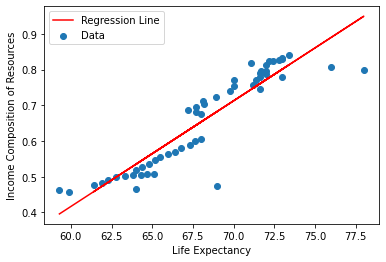

In [21]:
# Scatter plot of the data points
plt.scatter(X, Y, label='Data')

# Plot the regression line
regression_line = w * X + b
plt.plot(X, regression_line, color='red', label='Regression Line')

# Add labels and a legend
plt.xlabel('Life Expectancy')
plt.ylabel('Income Composition of Resources')
plt.legend()

# Show the plot
plt.show()

**TO CODE 3.4**

Now, implement a Gradient Descend function `def gradDescent(x, y, theta, alpha, iters)` where `x` are
the covariates, `y` the target value, `theta` the initial weights, `alpha` the learning rate and `iters` the number
of gradient descent iterations. Your function should return all intermediary values of `theta` that has been computed as a list.

In [22]:
def gradient_descent(x, y, theta, alpha, iters):
    # Initialize a list to store intermediate theta values
    theta_values = [theta.copy()]
    m = len(y)  # Number of data points

    for _ in range(iters):
        # Calculate the predicted values
        predictions = np.dot(x, theta)

        # Calculate the error (residuals)
        errors = predictions - y

        # Calculate the gradient of the cost function
        gradient = np.dot(x.T, errors) / m

        # Update theta using the gradient and learning rate
        theta -= alpha * gradient

        # Append the updated theta to the list
        theta_values.append(theta.copy())

    return theta_values


**TO CODE 3.5**

Compute the gradient descend on df_study for 1000 iterations with different values of `alpha`. You
may initialize `theta` with `theta_0 = 0` and `theta_1 = 1`

In [23]:

# Add a bias term to X
X = np.column_stack((np.ones_like(X), X))

# Initialize theta with theta_0 = 0 and theta_1 = 1 as float values
initial_theta = np.array([0.0, 1.0])

# List of alpha values to iterate through
alpha_values = [1e-06, 1e-05, 1e-04]

# Number of gradient descent iterations
iterations = 1000

# Dictionary to store intermediary theta values for each alpha
theta_values_dict = {}

# Perform gradient descent for each alpha
for alpha in alpha_values:
    # Perform gradient descent
    theta_values = gradient_descent(X, Y, initial_theta, alpha, iterations)

    # Store the theta values in the dictionary
    theta_values_dict[alpha] = theta_values

# Print the final optimized theta values for each alpha
for alpha, theta_values in theta_values_dict.items():
    final_theta = theta_values[-1]
    print(f"Alpha = {alpha}: Final optimized theta = {final_theta}")


Alpha = 1e-06: Final optimized theta = [-0.01432565  0.01909342]
Alpha = 1e-05: Final optimized theta = [-0.01450782  0.00996733]
Alpha = 0.0001: Final optimized theta = [-0.01499694  0.00997447]


**TO CODE 3.6**

On the same figure, plot the evolution of theta_0 through the iterations for each different values of
alpha you chose. Do the same thing for theta_1.

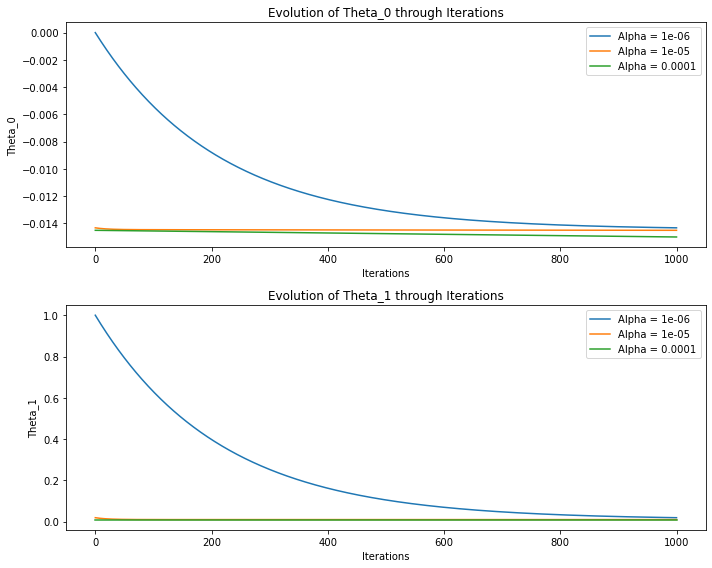

In [24]:
import matplotlib.pyplot as plt

# Create subplots for theta_0 and theta_1
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Iterate through each alpha value
for alpha, theta_values in theta_values_dict.items():
    # Extract theta_0 and theta_1 values for each iteration
    theta_0_values = [theta[0] for theta in theta_values]
    theta_1_values = [theta[1] for theta in theta_values]

    # Plot the evolution of theta_0 for each alpha
    axes[0].plot(range(iterations + 1), theta_0_values, label=f'Alpha = {alpha}')
    axes[0].set_xlabel('Iterations')
    axes[0].set_ylabel('Theta_0')
    axes[0].set_title('Evolution of Theta_0 through Iterations')
    axes[0].legend()

    # Plot the evolution of theta_1 for each alpha
    axes[1].plot(range(iterations + 1), theta_1_values, label=f'Alpha = {alpha}')
    axes[1].set_xlabel('Iterations')
    axes[1].set_ylabel('Theta_1')
    axes[1].set_title('Evolution of Theta_1 through Iterations')
    axes[1].legend()

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()


**Question 7**

Discuss on the role of alpha

$R^2$ is the coefficient of determination useful to score a regression against the ground truth data.

This coefficient can be computed with a sklearn function:

```
sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')
```

With:

**y_true** array-like of shape (n_samples,) or (n_samples, n_outputs)

Ground truth (correct) target values.

**y_pred** array-like of shape (n_samples,) or (n_samples, n_outputs)

Estimated target values.

**sample_weight** array-like of shape (n_samples,), default=None

Sample weights.

**multioutput** {‘raw_values’, ‘uniform_average’, ‘variance_weighted’}, array-like of shape (n_outputs,) or None, default=’uniform_average’

Defines aggregating of multiple output scores. Array-like value defines weights used to average scores. Default is “uniform_average”.

- ‘raw_values’: Returns a full set of scores in case of multioutput input.

- ‘uniform_average’: Scores of all outputs are averaged with uniform weight.

- ‘variance_weighted’: Scores of all outputs are averaged, weighted by the variances of each individual output.


In [25]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

**TO CODE 3.7**

Compute $R^2$ on the regression with df_study

In [26]:
# Extract features (X) and target (Y) from df_study
X = df_study['Life_expectancy'].values.reshape(-1, 1)  # Reshape X to a 2D array
Y = df_study['Income_composition_of_resources'].values

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X, Y)

# Make predictions using the trained model
y_pred = model.predict(X)

# Calculate the R² score
r_squared = r2_score(Y, y_pred)

print("R² Score:", r_squared)

R² Score: 0.8466322701522812


**QUESTION 8**

Is linear regression suited between the two selected variables?

Based on the R² score we obtained (R² Score: 0.8466), it appears that linear regression is reasonably well-suited for modeling the relationship between the two selected variables, "Life_expectancy" and "Income_composition_of_resources." An R² score of approximately 0.8466 indicates that the linear regression model explains a significant portion of the variance in the dependent variable ("Income_composition_of_resources") based on the independent variable ("Life_expectancy").

**QUESTION 9**

If not, what would be the relevant regression between these two variables?

Given the relatively high R² score, linear regression seems to provide a reasonable fit for your data.

## STEP 4: Multivariate regression

**TO DO 4.1**

Execute the following cells

In [27]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

df_study = df[(df.Country == "Belarus") | (df.Country == "Madagascar") | (df.Country == "India") | (df.Country == "Lithuania")]
y = df_study.Life_expectancy
X = df_study[['Adult_mortality', 'Alcohol', 'Total_expenditure', 'Income_composition_of_resources', 'Schooling', "HIV_AIDS"]].to_numpy(dtype='float64')

alphas = 10**np.linspace(10,-2,100)*0.5

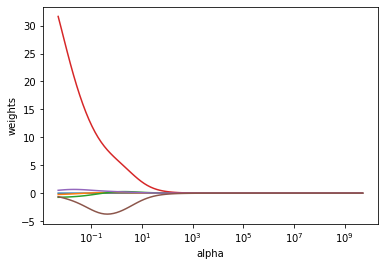

In [28]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

**QUESTION 10**

How do you interpret the plot?

**QUESTION 11**

Is it normal that the l2 diminishes with alpha increasing?


**QUESTION 12**

Which is the most relevant variable for Ridge? Prove and justify your response in the following cell

**TO DO 4.2**

Execute the following cell

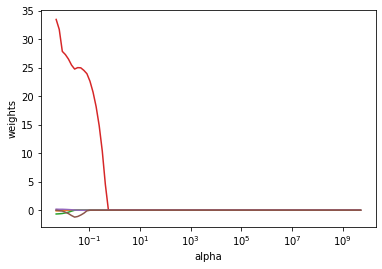

In [29]:
lasso = Lasso(normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

**QUESTION 13**

Which is the most relevant variable for Lasso? Prove and justify your response in the following cell

**QUESTION 14**

What is the main difference between Ridge and Lasso regression? For this setup, which is the prefered method to use? Justify your response

** TO CODE 4.3 **

Following the previous examples, use a sklearn function to compute a multivariable least square method. Compare the coefficients obtained by the different methods.

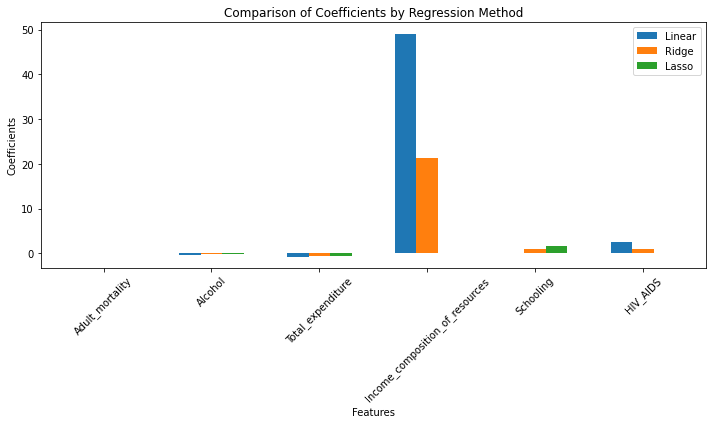

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a plain Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Fit a Ridge Regression model
ridge_reg = Ridge(alpha=0.01)  # You can adjust the alpha parameter as needed
ridge_reg.fit(X_train, y_train)

# Fit a Lasso Regression model
lasso_reg = Lasso(alpha=0.01)  # You can adjust the alpha parameter as needed
lasso_reg.fit(X_train, y_train)

# Get the coefficients
linear_coeffs = linear_reg.coef_
ridge_coeffs = ridge_reg.coef_
lasso_coeffs = lasso_reg.coef_

# Create a bar plot to compare coefficients
labels = X.columns
coefficients = [linear_coeffs, ridge_coeffs, lasso_coeffs]
methods = ['Linear', 'Ridge', 'Lasso']

plt.figure(figsize=(10, 6))
for i, method_coeffs in enumerate(coefficients):
    plt.bar(np.arange(len(labels)) + i * 0.2, method_coeffs, width=0.2, label=methods[i])

plt.xticks(np.arange(len(labels)) + 0.2, labels, rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Comparison of Coefficients by Regression Method')
plt.legend()
plt.tight_layout()
plt.show()


In [40]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test data
linear_preds = linear_reg.predict(X_test)
ridge_preds = ridge_reg.predict(X_test)
lasso_preds = lasso_reg.predict(X_test)

# Calculate Mean Squared Error (MSE) for each method
mse_linear = mean_squared_error(y_test, linear_preds)
mse_ridge = mean_squared_error(y_test, ridge_preds)
mse_lasso = mean_squared_error(y_test, lasso_preds)

# Print the MSE values
print("Linear Regression MSE:", mse_linear)
print("Ridge Regression MSE:", mse_ridge)
print("Lasso Regression MSE:", mse_lasso)


Linear Regression MSE: 1.9402308628689169
Ridge Regression MSE: 1.8089894214480124
Lasso Regression MSE: 1.9079877098272364


**TO CODE 4.4 **

Dealing with too many variables can sometimes be counter-productive and it can be more interesting to remove some features. One way to evaluate the importance of each variable is to compute the f_test whose function is named f_regression in sklearn.

In [42]:
from sklearn.feature_selection import f_regression

# Assuming you have your target variable (y) and feature matrix (X) defined as before

# Compute the F-statistic and p-values for each feature
f_values, p_values = f_regression(X, y)

# Sort the features based on F-statistic (higher is better)
sorted_indices = np.argsort(f_values)[::-1]

# Print the F-statistic and p-values for each feature, sorted by importance
for i in sorted_indices:
    print(f"Feature: {X.columns[i]}, F-Statistic: {f_values[i]}, p-value: {p_values[i]}")


Feature: Income_composition_of_resources, F-Statistic: 287.0543763777732, p-value: 8.047138826467633e-23
Feature: Schooling, F-Statistic: 261.50896011401613, p-value: 6.2120499379213e-22
Feature: Alcohol, F-Statistic: 125.09281253190987, p-value: 1.8919680465431873e-15
Feature: HIV_AIDS, F-Statistic: 106.62272299833975, p-value: 3.395111367295289e-14
Feature: Total_expenditure, F-Statistic: 36.72942029995129, p-value: 1.5451127077237152e-07
Feature: Adult_mortality, F-Statistic: 3.864442141527441, p-value: 0.05466967340213266


**QUESTION 15**

According to the f_test, rank each variable from the least to the most promising. Compare it with the correlation of your subset.

In [52]:
# Calculate correlation coefficients with the target variable
correlation_scores = df_study[['Income_composition_of_resources', 'Schooling', 'Alcohol', 'HIV_AIDS', 'Total_expenditure', 'Adult_mortality', 'Life_expectancy']].corr()['Life_expectancy'].abs()

# Rank variables based on F-test importance (higher F-statistic is better)
f_test_ranking = np.argsort(f_values)[::-1]

# Rank variables based on correlation (higher absolute correlation is better)
correlation_ranking = np.argsort(correlation_scores)[::-1]

# Print rankings
print("F-Test Ranking (Most to Least Promising):")
for i, idx in enumerate(f_test_ranking):
    print(f"{i+1}. {X.columns[idx]} (F-Statistic: {f_values[idx]}, p-value: {p_values[idx]})")

print("\nCorrelation Ranking (Most to Least Promising):")
for i, idx in enumerate(correlation_ranking):
    print(f"{i+1}. {correlation_scores.index[i]} (Correlation: {correlation_scores.iloc[i]})")

F-Test Ranking (Most to Least Promising):
1. Income_composition_of_resources (F-Statistic: 287.0543763777732, p-value: 8.047138826467633e-23)
2. Schooling (F-Statistic: 261.50896011401613, p-value: 6.2120499379213e-22)
3. Alcohol (F-Statistic: 125.09281253190987, p-value: 1.8919680465431873e-15)
4. HIV_AIDS (F-Statistic: 106.62272299833975, p-value: 3.395111367295289e-14)
5. Total_expenditure (F-Statistic: 36.72942029995129, p-value: 1.5451127077237152e-07)
6. Adult_mortality (F-Statistic: 3.864442141527441, p-value: 0.05466967340213266)

Correlation Ranking (Most to Least Promising):
1. Income_composition_of_resources (Correlation: 0.920126225119293)
2. Schooling (Correlation: 0.913310200346119)
3. Alcohol (Correlation: 0.8404574106653703)
4. HIV_AIDS (Correlation: 0.8198646933246203)
5. Total_expenditure (Correlation: 0.6433883828098728)
6. Adult_mortality (Correlation: 0.26301206529075233)
7. Life_expectancy (Correlation: 1.0)
